In [3]:
import pandas as pd
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Ensure you have the VADER lexicon
nltk.download('vader_lexicon')

# Sample dataset: Replace with your scraped news data
data = {
    "title": [
        "Stock markets plunge as fears of recession grow",
        "Tech companies report record profits despite economic uncertainty",
        "New policies aim to reduce carbon emissions significantly",
        "Sports team wins championship in thrilling final match",
        "Scientists discover breakthrough in cancer research"
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df["sentiment"] = df["title"].apply(lambda text: analyzer.polarity_scores(text)['compound'])

# Classify as Positive, Neutral, or Negative
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_label"] = df["sentiment"].apply(classify_sentiment)




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lucija/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,title,sentiment,sentiment_label
0,Stock markets plunge as fears of recession grow,-0.6808,Negative
1,Tech companies report record profits despite e...,0.6041,Positive
2,New policies aim to reduce carbon emissions si...,0.0000,Neutral
3,Sports team wins championship in thrilling fin...,0.8658,Positive
4,Scientists discover breakthrough in cancer res...,-0.6597,Negative


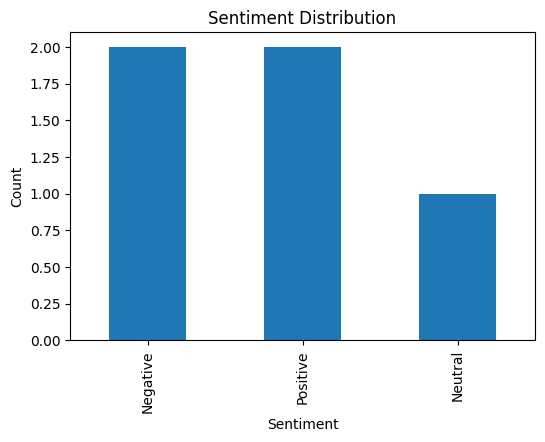

In [4]:
# Display results
from IPython.display import display
display(df)

# Plot sentiment distribution
plt.figure(figsize=(6,4))
df["sentiment_label"].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()